In [2]:
import pandas as pd

# Construct a downloadable link
dwn_url = f"https://drive.google.com/uc?export=download&id=1mB59W8xns79dpP50HeAAOyoyiauh1US2"

# Read directly into pandas
df = pd.read_csv(dwn_url)

# Check first few rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df_dropped = df.dropna(subset=["Embarked"]) # Drop the rows
df_dropped["Embarked"].isnull().sum() # Check again

np.int64(0)

In [5]:
df_dropped.loc[:, "Age"] = df_dropped["Age"].fillna(df_dropped["Age"].median()) # Replace
df_dropped["Age"].isnull().sum() # Check again

np.int64(0)

<Axes: xlabel='Fare'>

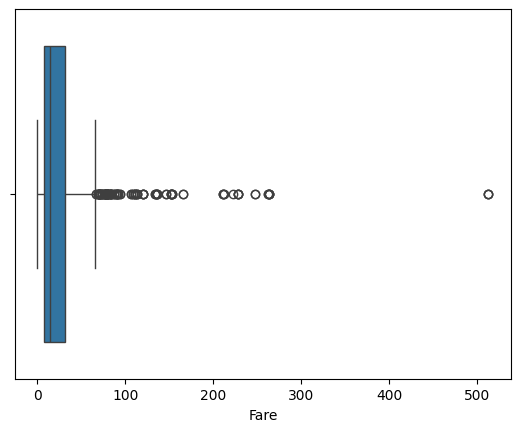

In [6]:
import seaborn as sns

sns.boxplot(x=df_dropped["Fare"])

In [7]:
Q1 = df_dropped["Fare"].quantile(0.25)
Q3 = df_dropped["Fare"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_dropped[(df_dropped["Fare"] < lower_bound) | (df_dropped["Fare"] > upper_bound)]
print(f"Number of outliers in Fare: {len(outliers)}")

Number of outliers in Fare: 114


In [8]:
df_removed = df_dropped[(df["Fare"] >= lower_bound) & (df_dropped["Fare"] <= upper_bound)]
df_removed.shape

C:\Users\adiaz\AppData\Local\Temp\ipykernel_11104\70685252.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_removed = df_dropped[(df["Fare"] >= lower_bound) & (df_dropped["Fare"] <= upper_bound)]


(775, 12)

<Axes: xlabel='Fare'>

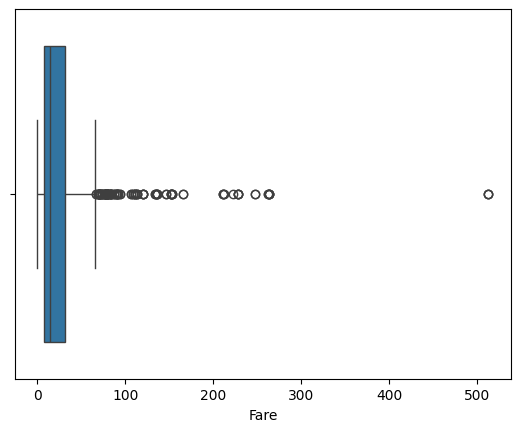

In [9]:
df_capped = df_dropped.copy()
df_capped["Fare"] = df_capped["Fare"].clip(lower=lower_bound, upper=upper_bound)
sns.boxplot(x=df_dropped["Fare"])

<Axes: xlabel='Fare', ylabel='Count'>

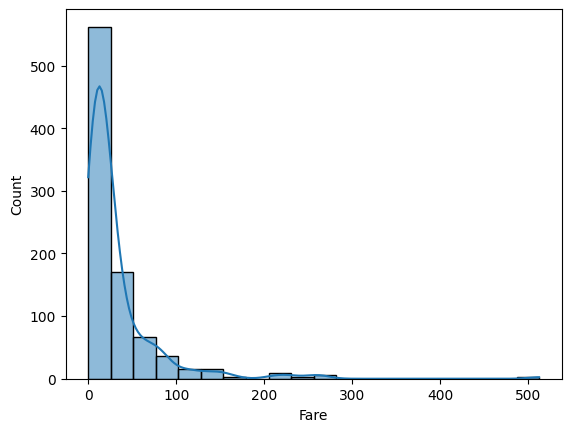

In [10]:
sns.histplot(df_dropped["Fare"], bins=20, kde=True)

C:\Users\adiaz\AppData\Local\Temp\ipykernel_11104\4255247150.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped["LogFare"] = np.log1p(df_dropped["Fare"])  # safer than log(Fare)


<Axes: xlabel='LogFare', ylabel='Count'>

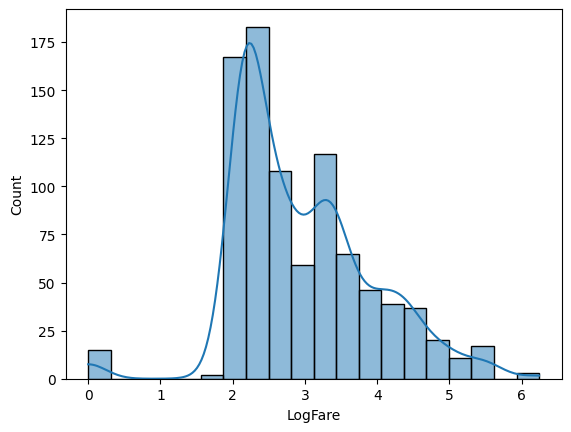

In [11]:
import numpy as np

df_dropped["LogFare"] = np.log1p(df_dropped["Fare"])  # safer than log(Fare)
sns.histplot(df_dropped["LogFare"], bins=20, kde=True)

In [12]:
Q1 = df_dropped["Age"].quantile(0.25)
Q3 = df_dropped["Age"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_dropped[(df_dropped["Age"] < lower_bound) | (df_dropped["Age"] > upper_bound)]
print(f"Number of outliers in Age: {len(outliers)}")

Number of outliers in Age: 65


In [13]:
df_removed = df_dropped[(df["Age"] >= lower_bound) & (df_dropped["Age"] <= upper_bound)]
df_removed.shape

C:\Users\adiaz\AppData\Local\Temp\ipykernel_11104\3556504444.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_removed = df_dropped[(df["Age"] >= lower_bound) & (df_dropped["Age"] <= upper_bound)]


(647, 13)

<Axes: xlabel='Age'>

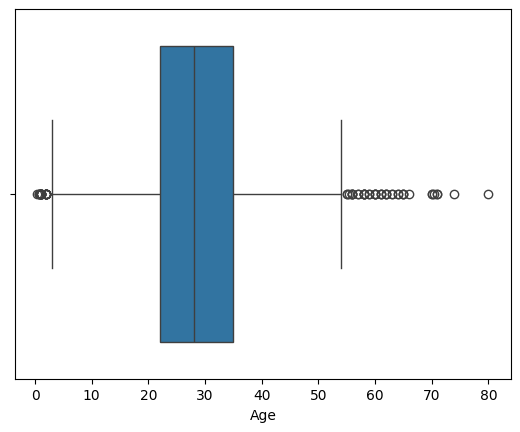

In [14]:
df_capped = df_dropped.copy()
df_capped["Age"] = df_capped["Age"].clip(lower=lower_bound, upper=upper_bound)
sns.boxplot(x=df_dropped["Age"])

In [15]:
df_dropped["Sex"].value_counts()

Sex
male      577
female    312
Name: count, dtype: int64

In [16]:
df_dropped["Sex"] = df_dropped["Sex"].map({"male": 0, "female": 1})
df_dropped["Sex"].value_counts()

C:\Users\adiaz\AppData\Local\Temp\ipykernel_11104\1546652136.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped["Sex"] = df_dropped["Sex"].map({"male": 0, "female": 1})


Sex
0    577
1    312
Name: count, dtype: int64

In [ ]:
df_dropped["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [18]:
pd.get_dummies(df_dropped, columns=["Embarked"], drop_first=True) 
# We are not saving the results as we just want to look at what it does

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,LogFare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2.110213,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,4.280593,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.188856,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,3.990834,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2.202765,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,2.639057,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,3.433987,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,NaN,3.196630,False,True
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,3.433987,False,False


In [19]:
df_dropped["Pclass"].unique()

array([3, 1, 2])